In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train, 10)

In [15]:
epochs, lr, beta, batch_size = 100, 0.1, 0.9, 128
num_batches, input_size, output_size = x_train.shape[0] // batch_size, 784, 10

In [17]:
def softmax(z): return np.exp(z - np.max(z, axis=1, keepdims=True)) / np.sum(np.exp(z - np.max(z, axis=1, keepdims=True)), axis=1, keepdims=True)
def compute_loss(y, y_pred): return -np.mean(np.sum(y * np.log(y_pred + 1e-8), axis=1))
def compute_grad(x, y, y_pred): return np.dot(x.T, (y_pred - y)) / x.shape[0]
def init_weights(): return np.random.randn(input_size, output_size) * 0.01

In [19]:
def train(opt='standard'):
    w, v, losses = init_weights(), np.zeros((input_size, output_size)), []
    for _ in range(epochs):
        loss_sum = 0
        for i in range(num_batches):
            x_b, y_b = x_train[i*batch_size:(i+1)*batch_size], y_train[i*batch_size:(i+1)*batch_size]
            y_pred = softmax(np.dot(x_b, w))
            loss_sum += compute_loss(y_b, y_pred)
            grad = compute_grad(x_b, y_b, y_pred)
            if opt == 'momentum': v = beta * v + (1 - beta) * grad; w -= lr * v
            else: w -= lr * grad
        losses.append(loss_sum / num_batches)
    return losses

In [22]:
loss_std = train('standard')
loss_mom = train('momentum')

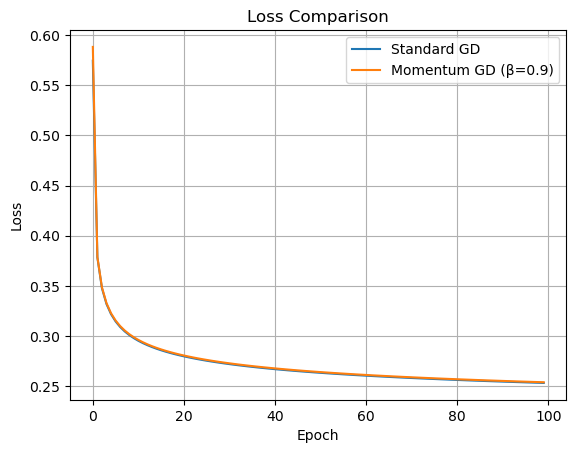

In [23]:
plt.plot(loss_std, label='Standard GD')
plt.plot(loss_mom, label='Momentum GD (β=0.9)')
plt.xlabel("Epoch"), plt.ylabel("Loss"), plt.title("Loss Comparison"), plt.legend(), plt.grid(True)
plt.show()